In [1]:
import tweepy
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
pd.set_option('display.max_colwidth', -1)

# Gather

In [3]:
# read the provided twitter archive into a pandas dataframe
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive = archive.sort_values('timestamp').reset_index(drop=True)
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None
1,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
3,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
4,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None


In [4]:
# download the image-predictions tsv file from the provided url and read it into a pandas dataframe
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

predictions = pd.read_csv('image_predictions.tsv', delimiter='\t')
predictions = predictions.sort_values('tweet_id').reset_index(drop=True)
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
#create and API to gather twitter data
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

#keep track of failed tweets
failed_tweets = []
with open('tweet_json.txt', 'w', encoding='utf-8') as file:
    #scraping tweet info from twitter
    for id in archive.tweet_id:
        try:
            tweetinfo = api.get_status(str(id), tweet_mode='extended')       
#             json.dump({'tweet_id': str(tweetinfo.id), 
#                            'tweet_count': str(tweetinfo.retweet_count), 
#                            'like_count': str(tweetinfo.favorite_count)}, file)
            json.dump(tweetinfo._json, file)
            file.write('\n')
        except:
            #print the tweet id, incase not able to get tweet and add to failed_tweets list
            failed_tweets.append(id)
print(failed_tweets)

In [5]:
#read the json file into a pandas dataframe
tweet_json = pd.read_json('tweet_json.txt', lines=True)
#keep the columns 'id', 'retweet_count', 'favorite_count'
tweet_json = tweet_json[['id', 'retweet_count', 'favorite_count', 'created_at', 'retweeted', 'full_text']]
tweet_json = tweet_json.sort_values('created_at').reset_index(drop=True)
tweet_json.head()

,id,retweet_count,favorite_count,created_at,retweeted,full_text
0,666020888022790149,511,2557,2015-11-15 22:32:08,False,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj
1,666029285002620928,47,130,2015-11-15 23:05:30,False,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI
2,666033412701032449,44,125,2015-11-15 23:21:54,False,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR
3,666044226329800704,141,298,2015-11-16 00:04:52,False,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx
4,666049248165822465,40,109,2015-11-16 00:24:50,False,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq


# Assess

In [6]:
#display and assess the archive dataframe
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None
1,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
3,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
4,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None


In [7]:
#check datatypes and number of non-null data points
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
#check for duplicates
archive[archive.duplicated(subset=['expanded_urls'], keep=False)].sort_values('expanded_urls')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2006,831650051525054464,NaN,NaN,2017-02-14 23:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t.co/piiX0ke8Z6 https://t.co/1UHrKcaCiO",NaN,NaN,NaN,"http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1",13,10,None,None,None,None,None
2151,852936405516943360,NaN,NaN,2017-04-14 17:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t…",8.316501e+17,4.196984e+09,2017-02-14 23:43:18 +0000,"http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1",13,10,None,None,None,None,None
17,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
1750,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
61,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0DvHAMdA4V,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,None,None,None,None,None
1312,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0Dv…,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,None,None,None,None,None
62,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://t.co/h9R0EwKd9X,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None
2082,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://…,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164079423490/phot

In [9]:
#check dog names
sum(archive.name.isnull())
archive.name.value_counts()

None         745
a            55 
Charlie      12 
Oliver       11 
Cooper       11 
Lucy         11 
Lola         10 
Penny        10 
Tucker       10 
Bo           9  
Winston      9  
Sadie        8  
the          8  
Buddy        7  
Toby         7  
Bailey       7  
Daisy        7  
an           7  
Jack         6  
Leo          6  
Milo         6  
Jax          6  
Stanley      6  
Scout        6  
Koda         6  
Oscar        6  
Rusty        6  
Bella        6  
Dave         6  
Oakley       5  
            ..  
Suki         1  
Schnitzel    1  
Juckson      1  
Huck         1  
Crumpet      1  
Iggy         1  
Kenzie       1  
Wesley       1  
Dug          1  
Darrel       1  
Halo         1  
Linus        1  
Superpup     1  
Charl        1  
Boston       1  
Hector       1  
Tanner       1  
Donny        1  
Carper       1  
Rover        1  
Bobbay       1  
Tuco         1  
Vixen        1  
Chaz         1  
Alejandro    1  
Keet         1  
Bradlay      1  
Sailor       1

In [10]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [11]:
archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [12]:
archive[archive.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
20,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None
512,675853064436391936,NaN,NaN,2015-12-13 01:41:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/675853064436391936/photo/1,https://twitter.com/dog_rates/status/675853064436391936/photo/1",88,80,None,None,None,None,None
576,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144,120,None,None,None,None,None
692,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None
693,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,11,Darrel,None,None,None,None
720,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868335505415/photo/1,121,110,None,None,None,None,None
721,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1",143,130,None,None,None,None,None
757,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",NaN,NaN,NaN,NaN,4,20,None,None,None,None,None
922,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031882764288/photo/1,44,40,None,None,None,None,None
1004,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,a,None,None,None,N

In [13]:
#print and assess predictions dataframe
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
#check for datatypes and missing values
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
#check for duplicates
predictions[predictions.duplicated(subset='jpg_url', keep=False)].sort_values('jpg_url')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [16]:
#check if all images are classified as a dog
len(predictions[(predictions.p1_dog == True) | (predictions.p2_dog == True) | (predictions.p3_dog == True)])

1751

In [17]:
#print and assess tweet_json dataframe
tweet_json.head()

,id,retweet_count,favorite_count,created_at,retweeted,full_text
0,666020888022790149,511,2557,2015-11-15 22:32:08,False,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj
1,666029285002620928,47,130,2015-11-15 23:05:30,False,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI
2,666033412701032449,44,125,2015-11-15 23:21:54,False,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR
3,666044226329800704,141,298,2015-11-16 00:04:52,False,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx
4,666049248165822465,40,109,2015-11-16 00:24:50,False,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq


In [18]:
#check for datatypes and missing values
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 6 columns):
id                2342 non-null int64
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
created_at        2342 non-null datetime64[ns]
retweeted         2342 non-null bool
full_text         2342 non-null object
dtypes: bool(1), datetime64[ns](1), int64(3), object(1)
memory usage: 93.8+ KB


In [19]:
#check for duplicates
tweet_json[tweet_json.id.duplicated()]

,id,retweet_count,favorite_count,created_at,retweeted,full_text


## Quality
- tweet_id has integer datatype instead of string in all three tables

### Archive Table
- timestamp and retweeted_status_timestamp have the wrong datatype (object instead of date)
- there are retweets in the dataset
- many errors in the dog names (e.g. a, an), some dogs do not have a name and the name column is recorded as 'None' instead of nan
- there are different rating_denominators that make the comaprison difficutl (there is a denominator of 0 in one case)

### Predictions Table
- most of column names are not descriptive
- it has less datapoints than the archive table (2075 compared to 2356), meaning a lot of the data in the archive table does not have an image and might be a retweet
- 324 images are not classified as dogs
- there are some duplicates of the same dog (same image url) tweeted with different ids 

## Tidyness
### Archive Table
- columns 'doggo', 'floofer', 'pupper', and 'puppo' should be combined in one column because they show the single variable dog_stage

### Predictions Table & Tweet_json Table
- there is no need for these separate tables, can be combined with the archive table

# Clean

In [20]:
#create a copy of all three datasets
archive_clean = archive.copy()
predictions_clean = predictions.copy()
tweet_json_clean = tweet_json.copy()

#### quality issue 1

- tweet_id has integer datatype instead of string in all three tables

#### define
use astype() to change the type of tweet_id to string

#### code

In [21]:
archive_clean['tweet_id']=archive_clean['tweet_id'].astype(str)
predictions_clean.tweet_id=predictions_clean.tweet_id.astype(str)
tweet_json_clean.id=tweet_json.id.astype(str)

#### test

In [22]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [23]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### quality issue 2
- timestamp and retweeted_status_timestamp in archive table have the wrong datatype (object instead of date)

#### define
use pandas to_datetime to convert timestamps
from string to a datetime

#### code

In [24]:
# use to_datetime to change timestamp and retweeted_status_timestamp from string to datetime
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
archive_clean.retweeted_status_timestamp = pd.to_datetime(archive_clean.retweeted_status_timestamp)

#### test

In [25]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetim

#### quality issue 3
- there are retweets in the archive dataset

#### define
- Delete the tweets that don't have any image in the expanded_url. Delete tweets where the expanded_url is a duplicate.
- Delete tweets that have a value in columns retweeted_status_id, retweeted_status_user_id, or retweeted_status_timestamp

#### code

In [26]:
test=archive_clean.copy()
archive_clean.dropna(subset=['expanded_urls'], inplace=True)
archive_clean.drop_duplicates(subset=['expanded_urls'], inplace=True)
archive_clean = archive_clean[pd.isnull(archive_clean.retweeted_status_id) | 
                              pd.isnull(archive_clean.retweeted_status_user_id) | 
                              pd.isnull(archive_clean.retweeted_status_timestamp)]
archive_clean.reset_index(drop=True, inplace=True)

#### test

In [27]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 17 columns):
tweet_id                      2116 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2116 non-null datetime64[ns]
source                        2116 non-null object
text                          2116 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2116 non-null object
rating_numerator              2116 non-null int64
rating_denominator            2116 non-null int64
name                          2116 non-null object
doggo                         2116 non-null object
floofer                       2116 non-null object
pupper                        2116 non-null object
puppo                         2116 non-null object
dtypes: datetime64[ns

In [28]:
archive_clean[archive_clean.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### quality issue 4
- many errors in the dog names (e.g. a, an) in theh archive table, some dogs do not have a name and the name column is recorded as the string 'None' instead of np.nan and hence cannot be found using isnull function

#### define
find the erroneous names by looking for names with less than 4 letters. change all erroneous names to np.nan

#### code

In [29]:
archive_clean.name.where(archive_clean.name.str.len() <4).unique()

array([nan, 'a', 'an', 'the', 'Stu', 'Ron', 'Jo', 'Dug', 'Ben', 'Sam',
       'Edd', 'Gin', 'Amy', 'Lou', 'Pip', 'Jax', 'JD', 'Mia', 'Cal',
       'Taz', 'Ed', 'Mac', 'Eve', 'Dot', 'one', 'Gus', 'Bob', 'Ava',
       'Jeb', 'Moe', 'Ash', 'Tug', 'Evy', 'by', 'Bo', 'Obi', 'Leo', 'Ole',
       'Max', 'old', 'Sid', 'all', 'mad', 'Ted', 'his', 'not', 'Blu',
       'Zoe', 'Ace', 'Dex', 'my', 'Al', 'O', 'Mya', 'Jay', 'Doc', 'Eli',
       'Tyr', 'Ito', 'Sky', 'Alf', 'Ken', 'Tom', 'Mo', 'Ike', 'Jed',
       'Aja', 'Rey', 'Jim'], dtype=object)

In [30]:
# store erronous names('a', 'an', 'the', 'one', 'by', 'all', 'mad', 'his', 'not') that need to be changed to pandas np.nan 
# in a list
none_list = ['a', 'an', 'the', 'one', 'by', 'all', 'mad', 'his', 'not', 'None']

In [31]:
for name in none_list:
    archive_clean.name.replace(to_replace=name , value=np.nan , inplace=True)

#### test

In [32]:
sum(archive_clean.name.isnull())

700

In [33]:
archive_clean.name.value_counts()

Charlie      11
Lucy         11
Cooper       10
Oliver       10
Penny        9 
Tucker       9 
Sadie        8 
Winston      8 
Lola         8 
Daisy        7 
Toby         7 
Oscar        6 
Bailey       6 
Jax          6 
Stanley      6 
Bella        6 
Koda         6 
Bo           6 
Bentley      5 
Leo          5 
Buddy        5 
Scout        5 
Chester      5 
Rusty        5 
Milo         5 
Dave         5 
Louis        5 
Duke         4 
Gary         4 
Cassie       4 
            .. 
Gidget       1 
Griswold     1 
Staniel      1 
Rodney       1 
Alejandro    1 
Chaz         1 
Vixen        1 
Tuco         1 
DayZ         1 
Billy        1 
Lassie       1 
Snickers     1 
Bilbo        1 
Mollie       1 
Blipson      1 
Ed           1 
Burt         1 
Darrel       1 
Halo         1 
Linus        1 
Superpup     1 
Charl        1 
Meyer        1 
Boston       1 
Hector       1 
Tanner       1 
Dug          1 
Carper       1 
Bobbay       1 
Shnuggles    1 
Name: name, Length: 946,

#### quality issue 5
- there are different rating_denominators that make the comaprison difficult (there is a missing numerator and denominator) in the archive table

#### define
- extract the right rating from the text of comment
- Create a new column 'rating' and find the rating in the scale of 0 to 10. This can be achived by dividing the numerator by the denominators column and multiplying the result by 10. Drop the tweet that has no rating.

#### code

In [34]:
#extract the correct rating numerator and denominator from the column 'text' using regext and extract function
ratings = archive_clean.text.str.extract(r'((?:\d+\.)?\d+)\/(\d+\.?\d+)', expand=True)
archive_clean['rating_numerator'] = ratings[0]
archive_clean['rating_denominator'] = ratings[1]
#change the numerator and denominator to float
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype(float)
archive_clean['rating_denominator'] = archive_clean['rating_denominator'].astype(float)

In [35]:
#normalize the rating by making all the rating in the scale of 0 to 10
archive_clean['rating'] = archive_clean.rating_numerator / archive_clean.rating_denominator *10

In [36]:
#delete the tweet with missing rating
archive_clean.dropna(subset=['rating_denominator'], inplace=True)
archive_clean.reset_index(drop=True, inplace=True)

#### test

In [37]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'rating'],
      dtype='object')

In [38]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 18 columns):
tweet_id                      2115 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2115 non-null datetime64[ns]
source                        2115 non-null object
text                          2115 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2115 non-null object
rating_numerator              2115 non-null float64
rating_denominator            2115 non-null float64
name                          1415 non-null object
doggo                         2115 non-null object
floofer                       2115 non-null object
pupper                        2115 non-null object
puppo                         2115 non-null object
rating           

#### quality issue 6
- most of column names are not descriptive in the predictions table

#### define
change ('p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog') to ('prediction1', 'prediction1_confidence', 'prediction1_dog', 'prediction2', 'prediction2_confidence', 'prediction2_dog', 'prediction3', 'prediction3_confidence', 'prediction3_dog')

#### code

In [39]:
# check the current culomn names
predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [40]:
# change column names to more descriptive names
predictions_clean.rename(columns={'p1':'prediction1', 'p1_conf':'prediction1_confidence', 'p1_dog':'prediction1_dog', 
                                  'p2':'prediction2', 'p2_conf':'prediction2_confidence', 'p2_dog':'prediction2_dog', 
                                  'p3':'prediction3', 'p3_conf':'prediction3_confidence', 'p3_dog':'prediction3_dog'
                                 }, inplace=True)

#### test

In [41]:
predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction1',
       'prediction1_confidence', 'prediction1_dog', 'prediction2',
       'prediction2_confidence', 'prediction2_dog', 'prediction3',
       'prediction3_confidence', 'prediction3_dog'],
      dtype='object')

#### quality issue 7
- it has less datapoints than the archive table (2075 compared to 2356), meaning a lot of the data in the archive table does not have an image and might be a retweet

#### define
this issue will be addressed after merging the datasets

#### quality issue 8
- 324 images are not classified as dogs

#### define
find tweets that were not classified as a dog and remove them from the table

#### code

In [42]:
predictions_clean.drop(predictions_clean[(predictions_clean.prediction1_dog == False) & 
                  (predictions_clean.prediction2_dog == False) & 
                  (predictions_clean.prediction3_dog == False)].index, inplace=True)
predictions_clean.reset_index(drop=True, inplace=True)

#### test

In [43]:
predictions_clean[(predictions_clean.prediction1_dog == False) & 
                  (predictions_clean.prediction2_dog == False) & 
                  (predictions_clean.prediction3_dog == False)]

,tweet_id,jpg_url,img_num,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog


#### quality issue 9
- there are some duplicates of the same dog (same image url) tweeted with different ids


In [44]:
predictions_clean.drop_duplicates(subset='jpg_url', inplace=True)
predictions_clean.reset_index(drop=True, inplace=True)

#### test

In [45]:
predictions_clean[predictions_clean.duplicated(subset='jpg_url', keep=False)]

,tweet_id,jpg_url,img_num,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog


#### tidyness issue 1
- columns 'doggo', 'floofer', 'pupper', and 'puppo' in the archive table should be combined in one column because they show the single variable dog_stage


#### defined
create a new column called dog_stage and use str.cat to combine the four columns 'doggo', 'floofer', 'pupper', and 'puppo' into one.

In [46]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'rating'],
      dtype='object')

In [47]:
#replace the None values with np.nan in the four columns 'doggo', 'floofer', 'pupper', and 'puppo'
archive_clean.doggo.replace(to_replace='None' , value=np.nan , inplace=True)
archive_clean.floofer.replace(to_replace='None' , value=np.nan , inplace=True)
archive_clean.pupper.replace(to_replace='None' , value=np.nan , inplace=True)
archive_clean.puppo.replace(to_replace='None' , value=np.nan , inplace=True)
#use str.cat to combine the four columns into the new dolumn 'dog_stage',use '' when the dog stage hasn't been identified
archive_clean['dog_stage'] = archive_clean.doggo.str.cat(archive_clean[['floofer', 'pupper', 'puppo']], na_rep='')
#drop the original columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
#replace '' values with np.nan and reset the indexing
archive_clean.dog_stage.replace(to_replace='' , value=np.nan , inplace=True)
archive_clean.reset_index(drop=True, inplace=True)

#### test

In [48]:
archive_clean.dog_stage.unique()

array([nan, 'pupper', 'floofer', 'doggo', 'doggopupper', 'puppo',
       'doggofloofer', 'doggopuppo'], dtype=object)

This shows a new issue: there are dogs that have been identified in more than one stage. Cleaning these tweets is beyond the scope of this work

#### tidyness issue 2
- there is no need for separate predictions and tweet_json tables, can be combined with the archive table

#### define
merge the three dataset and then remove the potential duplicates and retweets

#### code

In [49]:
archive_master = pd.merge(archive_clean, predictions_clean, on='tweet_id', how='left')
archive_master = pd.merge(archive_master, tweet_json_clean, 
                         left_on=['tweet_id', 'timestamp'], right_on=['id', 'created_at'], how='left')
#drop the id and created_at columns
archive_master.drop(['id', 'created_at'], axis=1, inplace=True)

#### test

In [50]:
archive_master.shape

(2115, 30)

In [51]:
archive_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'rating', 'dog_stage', 'jpg_url',
       'img_num', 'prediction1', 'prediction1_confidence', 'prediction1_dog',
       'prediction2', 'prediction2_confidence', 'prediction2_dog',
       'prediction3', 'prediction3_confidence', 'prediction3_dog',
       'retweet_count', 'favorite_count', 'retweeted', 'full_text'],
      dtype='object')

#### quality issue 7
- it has less datapoints than the archive table (2075 compared to 2356), meaning a lot of the data in the archive table does not have an image and might be a retweet

#### define
Now that the tables have been merged, this issue can be addressed by removing the tweets that do not have a jpg_url

#### code

In [52]:
sum(archive_master.jpg_url.isnull())

430

In [53]:
archive_master_clean = archive_master.copy()
#drop the tweets that don't have a jpg_url since, the dog couln't have been identified
archive_master_clean.dropna(subset=['jpg_url'], inplace=True)
archive_master_clean.reset_index(drop=True, inplace=True)

#### test

In [54]:
sum(archive_master_clean.jpg_url.isnull())

0

In [55]:
archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1685 entries, 0 to 1684
Data columns (total 30 columns):
tweet_id                      1685 non-null object
in_reply_to_status_id         20 non-null float64
in_reply_to_user_id           20 non-null float64
timestamp                     1685 non-null datetime64[ns]
source                        1685 non-null object
text                          1685 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1685 non-null object
rating_numerator              1685 non-null float64
rating_denominator            1685 non-null float64
name                          1204 non-null object
rating                        1685 non-null float64
dog_stage                     260 non-null object
jpg_url                       1685 non-null object
img_num                       1685 non-null float64
prediction1     

#### quality issue 10
- columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweted_status_timestamp, retweeted do not provide a lot of information
- column full_text has the same information as column text

#### define
delete these unnecessary columns from the master dataset


#### code

In [56]:
columns=['in_reply_to_status_id', 'in_reply_to_user_id', 
         'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 
         'full_text', 'retweeted']
archive_master_clean.drop(columns, axis=1, inplace=True)

#### test

In [57]:
archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1685 entries, 0 to 1684
Data columns (total 23 columns):
tweet_id                  1685 non-null object
timestamp                 1685 non-null datetime64[ns]
source                    1685 non-null object
text                      1685 non-null object
expanded_urls             1685 non-null object
rating_numerator          1685 non-null float64
rating_denominator        1685 non-null float64
name                      1204 non-null object
rating                    1685 non-null float64
dog_stage                 260 non-null object
jpg_url                   1685 non-null object
img_num                   1685 non-null float64
prediction1               1685 non-null object
prediction1_confidence    1685 non-null float64
prediction1_dog           1685 non-null object
prediction2               1685 non-null object
prediction2_confidence    1685 non-null float64
prediction2_dog           1685 non-null object
prediction3               1685 non

#### quality issue 11
Currently the tweet source is in format of a url that is hard to categorize

#### defined
extract the source from the url format and store it in a new column

#### code

In [58]:
#extract the source using split function and store in the new column 'source_type' 
archive_master_clean['source_type'] = archive_master_clean.source.apply(lambda x: x.split('>')[-2][:-3])
#drop the source column
archive_master_clean.drop('source', axis=1, inplace=True)

#### test

In [59]:
archive_master_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'rating', 'dog_stage', 'jpg_url',
       'img_num', 'prediction1', 'prediction1_confidence', 'prediction1_dog',
       'prediction2', 'prediction2_confidence', 'prediction2_dog',
       'prediction3', 'prediction3_confidence', 'prediction3_dog',
       'retweet_count', 'favorite_count', 'source_type'],
      dtype='object')

In [60]:
archive_master_clean.source_type.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'],
      dtype=object)

#### tidyness issue 3
- there are three different predictions for every dog which can make analysis confusing

#### define
- go through predictions and change the non-dogs to np.nan
- create a new column with the most probable prediction for the dog and another column for the confidence level

#### code

In [61]:
#change the prediction and prediction_confidence to np.nan if the image is not a dog
archive_master_clean['prediction1'] = np.where(archive_master_clean['prediction1_dog'] == False, 
                                               np.nan, archive_master_clean['prediction1'])
archive_master_clean['prediction1_confidence'] = np.where(archive_master_clean['prediction1_dog'] == False, 
                                                          np.nan, archive_master_clean['prediction1_confidence'])
archive_master_clean['prediction2'] = np.where(archive_master_clean['prediction2_dog'] == False,
                                               np.nan, archive_master_clean['prediction2'])
archive_master_clean['prediction2_confidence'] = np.where(archive_master_clean['prediction2_dog'] == False,
                                                          np.nan, archive_master_clean['prediction2_confidence'])
archive_master_clean['prediction3'] = np.where(archive_master_clean['prediction3_dog'] == False,
                                               np.nan, archive_master_clean['prediction3'])
archive_master_clean['prediction3_confidence'] = np.where(archive_master_clean['prediction3_dog'] == False,
                                                          np.nan, archive_master_clean['prediction3_confidence'])

In [62]:
#find the maximum confidence level
archive_master_clean['max_confidence'] = archive_master_clean[[
    'prediction1_confidence', 'prediction2_confidence', 'prediction3_confidence']].max(axis=1)
#find the prediction algorithm with the maximum confidence level (i.e. the column name)
archive_master_clean['max_column'] = archive_master_clean[[
    'prediction1_confidence', 'prediction2_confidence', 'prediction3_confidence']].idxmax(axis=1)
# archive_master_clean['prediction_algorithm'] = archive_master_clean['prediction_algorithm'].apply(lambda x: x.split('_')[0])
archive_master_clean['prediction_algorithm'] = archive_master_clean['max_column'].apply(lambda x: x.split('_')[0])
archive_master_clean['dog_notDog'] = archive_master_clean['max_column'].apply(lambda x: x.split('_')[0]+'_dog')
#save the most probably dog breed in a new column
archive_master_clean['best_prediction'] = archive_master_clean.lookup(archive_master_clean.index, 
                                                                      archive_master_clean['prediction_algorithm'])
archive_master_clean['best_prediction_dog'] = archive_master_clean.lookup(archive_master_clean.index, 
                                                                      archive_master_clean['dog_notDog'])
#drop the unnecessary columns
archive_master_clean.drop(['max_column', 'dog_notDog'], axis=1, inplace=True)

#### test

In [63]:
archive_master_clean[['prediction1', 'prediction1_confidence', 'prediction1_dog']][archive_master_clean.prediction1_dog == False].head()

,prediction1,prediction1_confidence,prediction1_dog
7,NaN,NaN,False
18,NaN,NaN,False
27,NaN,NaN,False
37,NaN,NaN,False
43,NaN,NaN,False


In [64]:
archive_master_clean[archive_master_clean.best_prediction_dog == False]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,jpg_url,...,prediction3,prediction3_confidence,prediction3_dog,retweet_count,favorite_count,source_type,max_confidence,prediction_algorithm,best_prediction,best_prediction_dog


In [65]:
archive_master_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'rating', 'dog_stage', 'jpg_url',
       'img_num', 'prediction1', 'prediction1_confidence', 'prediction1_dog',
       'prediction2', 'prediction2_confidence', 'prediction2_dog',
       'prediction3', 'prediction3_confidence', 'prediction3_dog',
       'retweet_count', 'favorite_count', 'source_type', 'max_confidence',
       'prediction_algorithm', 'best_prediction', 'best_prediction_dog'],
      dtype='object')

In [66]:
archive_master_clean[['prediction1', 'prediction1_confidence', 
                       'prediction2', 'prediction2_confidence', 
                       'prediction3', 'prediction3_confidence', 
                       'max_confidence', 'prediction_algorithm', 'best_prediction']].head()

,prediction1,prediction1_confidence,prediction2,prediction2_confidence,prediction3,prediction3_confidence,max_confidence,prediction_algorithm,best_prediction
0,Welsh_springer_spaniel,0.465074,collie,0.156665,Shetland_sheepdog,0.061428,0.465074,prediction1,Welsh_springer_spaniel
1,redbone,0.506826,miniature_pinscher,0.074192,Rhodesian_ridgeback,0.072010,0.506826,prediction1,redbone
2,German_shepherd,0.596461,malinois,0.138584,bloodhound,0.116197,0.596461,prediction1,German_shepherd
3,Rhodesian_ridgeback,0.408143,redbone,0.360687,miniature_pinscher,0.222752,0.408143,prediction1,Rhodesian_ridgeback
4,miniature_pinscher,0.560311,Rottweiler,0.243682,Doberman,0.154629,0.560311,prediction1,miniature_pinscher


# Save the dataset to a csv file

In [67]:
archive_master_clean.to_csv('twitter_archive_master.csv', encoding = 'utf-8')

# Analyze

In [68]:
#look at the dog breed that have been tweeted the most
archive_master_clean.best_prediction.value_counts().head(10)

golden_retriever      157
Labrador_retriever    108
Pembroke              95 
Chihuahua             91 
pug                   62 
toy_poodle            51 
chow                  48 
Pomeranian            42 
Samoyed               42 
malamute              33 
Name: best_prediction, dtype: int64

In [69]:
# look at the dog brees with the most retweets
total_retweets = archive_master_clean.groupby(['best_prediction'])['retweet_count'].sum().sort_values(
    ascending=False).head(10).reset_index(name="retweet_count")
total_retweets

,best_prediction,retweet_count
0,golden_retriever,567262.0
1,Labrador_retriever,398347.0
2,Pembroke,282330.0
3,Chihuahua,251010.0
4,Samoyed,194206.0
5,French_bulldog,157484.0
6,cocker_spaniel,142251.0
7,chow,128415.0
8,pug,113560.0
9,toy_poodle,111091.0


Text(0.5,1,'Retweet Counts for Different Dog Breeds')

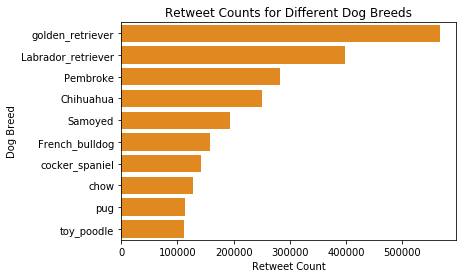

In [70]:
ax = sns.barplot(y='best_prediction', x='retweet_count', data=total_retweets, color='darkorange')
ax.set_ylabel('Dog Breed')
ax.set_xlabel('Retweet Count')
ax.set_title('Retweet Counts for Different Dog Breeds')

Golden_retriever and Labrador_retriever are the most retweeted dog breed.

In [71]:
#look at the most favorite dog breeds
total_favorite = archive_master_clean.groupby(['best_prediction'])['favorite_count'].sum().sort_values(
    ascending=False).head(10).reset_index(name="favorite_count")
total_favorite

,best_prediction,favorite_count
0,golden_retriever,1904791.0
1,Labrador_retriever,1272483.0
2,Pembroke,1027837.0
3,Chihuahua,756138.0
4,French_bulldog,595310.0
5,Samoyed,566429.0
6,chow,444365.0
7,cocker_spaniel,402894.0
8,pug,372162.0
9,malamute,347560.0


Text(0.5,1,'Favorite Counts for Different Dog Breeds')

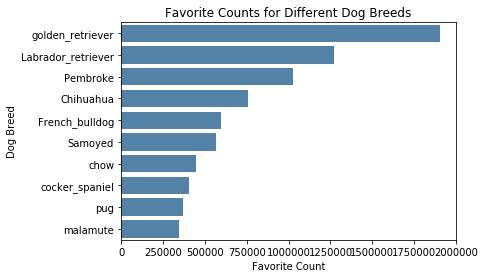

In [72]:
ax = sns.barplot(y='best_prediction', x='favorite_count', data=total_favorite, color='steelblue')
ax.set_ylabel('Dog Breed')
ax.set_xlabel('Favorite Count')
ax.set_title('Favorite Counts for Different Dog Breeds')

Golden_retriever and Labrador_retriever are the dog breeds with the most favorite counts as well. As a matter of fact, the top 10 dog breeds that have the most number of retweets also have the most number of favorite counts.

In [94]:
archive_master_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'rating', 'dog_stage', 'jpg_url',
       'img_num', 'prediction1', 'prediction1_confidence', 'prediction1_dog',
       'prediction2', 'prediction2_confidence', 'prediction2_dog',
       'prediction3', 'prediction3_confidence', 'prediction3_dog',
       'retweet_count', 'favorite_count', 'source_type', 'max_confidence',
       'prediction_algorithm', 'best_prediction', 'best_prediction_dog'],
      dtype='object')

In [95]:
#see which prediction algorithm had the highest confidence level incidents
archive_master_clean.prediction_algorithm.value_counts()

prediction1    1476
prediction2    147 
prediction3    62  
Name: prediction_algorithm, dtype: int64

Text(0.5,0,'Prediction Algorithm')

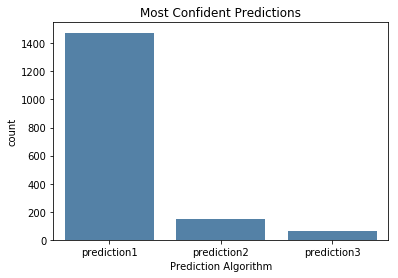

In [96]:
ax = sns.countplot(x='prediction_algorithm', data=archive_master_clean, 
              order=['prediction1', 'prediction2', 'prediction3'], color='steelblue')
ax.set_title('Most Confident Predictions')
ax.set_xlabel('Prediction Algorithm')

The first prediction algorithm has the most number of incidents with the maximum confidence level, showing that this algorithm does a better job at identifying images compared to the second and the third algorithms. Prediction 3 algorighm by far has the worst outcome.

In [97]:
#see how many times each source has been used to tweet
archive_master_clean.source_type.value_counts()

Twitter for iPhone    1654
Twitter Web Client    22  
TweetDeck             9   
Name: source_type, dtype: int64

Text(0.5,0,'Source')

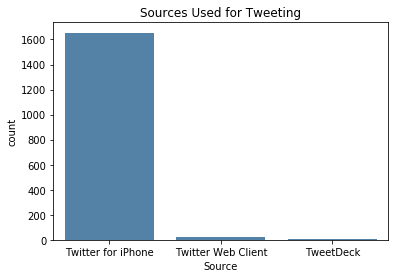

In [98]:
ax = sns.countplot(x='source_type', data=archive_master_clean, color='steelblue')
ax.set_title('Sources Used for Tweeting')
ax.set_xlabel('Source')

The twitter for Iphone has been used the most to send tweets with #WeRateDogs. The web clinet and TweetDeck are not very popular sources.